### Multilabel Classification with Python

##### Multilabel Dataset Examples
+ https://sci2s.ugr.es/keel/multilabel.php#sub10



![](multi-class_vs_multi_label_classification_jcharistech.png)

#### Solution for Multi-Label Problem
+ Methods for solving Multi-label Classification Problems
    + Problem Transformation
    + Adapted Algorithm
    + Ensemble approaches

#### Problem Transformation
+ It refers to transforming the multi-label problem into single-label problem(s) by using
    - Binary Relevance: treats each label as a separate single class classification
    - Classifier Chains:In this, the first classifier is trained just on the input data and then each next classifier is trained on the input space and all the previous classifiers in the chain.
    - Label Powerset:we transform the problem into a multi-class problem with one multi-class classifier is trained on all unique label combinations found in the training data.

        
#### Adapted Algorithm
+ adapting the algorithm to directly perform multi-label classification, rather than transforming the problem into different subsets of problems.
   

In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [2]:
# Load Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss,classification_report

In [5]:
### Split Dataset into Train and Text
from sklearn.model_selection import train_test_split
# Feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
# Multi Label Pkgs
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN


In [6]:
# !pip install scikit-multilearn

In [9]:
# Load Dataset
df = pd.read_csv("data/so_dataset_2_tags.csv")

In [10]:
df.head()

,title,tags,mysql,python,php
0,Flask-SQLAlchemy - When are the tables/databas...,"['python', 'mysql']",1,1.0,0.0
1,Combining two PHP variables for MySQL query,"['php', 'mysql']",1,0.0,1.0
2,'Counting' the number of records that match a ...,"['php', 'mysql']",1,0.0,1.0
3,Insert new row in a table and auto id number. ...,"['php', 'mysql']",1,0.0,1.0
4,Create Multiple MySQL tables using PHP,"['php', 'mysql']",1,0.0,1.0


In [11]:
df.loc[0].title

'Flask-SQLAlchemy - When are the tables/databases created and destroyed?'

In [12]:
df.dtypes

title      object
tags       object
mysql       int64
python    float64
php       float64
dtype: object

In [13]:
# Convert to Float
df['mysql'] = df['mysql'].astype(float)

In [14]:
df.dtypes

title      object
tags       object
mysql     float64
python    float64
php       float64
dtype: object

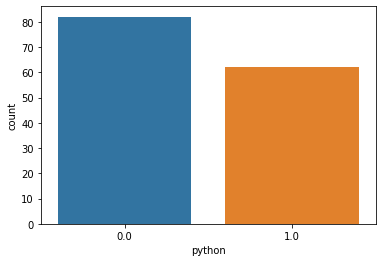

In [15]:
# Value Count 
sns.countplot(df['python'])

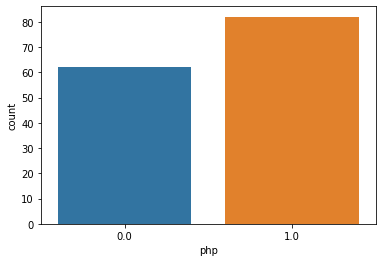

In [16]:
# Value Count 
sns.countplot(df['php'])

In [17]:
df['php'].value_counts()

1.0    82
0.0    62
Name: php, dtype: int64

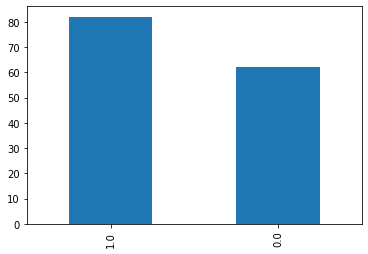

In [18]:
df['php'].value_counts().plot(kind='bar')

### Text Preprocessing
+ neattext : remove_stopwords
+ pip install neattext

In [19]:
import neattext as nt
import neattext.functions as nfx

In [21]:
# Explore For Noise
df['title'].apply(lambda x:nt.TextFrame(x).noise_scan())

0      {'text_noise': 11.267605633802818, 'text_lengt...
1      {'text_noise': 4.651162790697675, 'text_length...
2      {'text_noise': 9.90990990990991, 'text_length'...
3      {'text_noise': 8.47457627118644, 'text_length'...
4      {'text_noise': 2.631578947368421, 'text_length...
                             ...                        
139    {'text_noise': 26.41509433962264, 'text_length...
140    {'text_noise': 3.8461538461538463, 'text_lengt...
141    {'text_noise': 6.666666666666667, 'text_length...
142    {'text_noise': 13.636363636363635, 'text_lengt...
143    {'text_noise': 7.142857142857142, 'text_length...
Name: title, Length: 144, dtype: object

In [22]:
# Explore For Noise
df['title'].apply(lambda x:nt.TextExtractor(x).extract_stopwords())

0                                [when, are, the, and]
1                                           [two, for]
2                    [the, of, that, a, and, the, and]
3                                    [in, a, and, and]
4                                              [using]
                            ...                       
139                                 [where, in, using]
140                                               [to]
141                                  [and, get, using]
142    [how, to, the, of, a, with, a, back, into, the]
143                                           [in, if]
Name: title, Length: 144, dtype: object

In [23]:
dir(nfx)

['CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'TextFrame',
 'URL_PATTERN',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_html_tags',
 'extract_numbers',
 'extract_phone_numbers',
 'extract_special_characters',
 'extract_stopwords',
 'extract_urls',
 'fix_contractions',
 'generate_sentence',
 'hamming_distance',
 'inverse_df',
 'lexical_richness',
 'markov_chain',
 'math',
 'nlargest',
 'normalize',
 'num2words',
 'random

In [24]:
# Explore For Noise
df['title'].apply(nfx.remove_stopwords)

0      Flask-SQLAlchemy - tables/databases created de...
1                    Combining PHP variables MySQL query
2      'Counting' number records match certain criter...
3         Insert new row table auto id number. Php MySQL
4                       Create Multiple MySQL tables PHP
                             ...                        
139               Executing "SELECT ... ... ..." MySQLdb
140                              SQLAlchemy reconnect db
141                      mysql Count Distinct result php
142    store result radio button database value, data...
143                 Use SQL count result statement - PHP
Name: title, Length: 144, dtype: object

In [25]:
corpus = df['title'].apply(nfx.remove_stopwords)

### Feature Engineering
+ Build features from our text
+ TFIDF,countvectorizer,bow

In [26]:
tfidf = TfidfVectorizer()

In [27]:
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [28]:
# Build Features
Xfeatures = tfidf.fit_transform(corpus).toarray()

In [29]:
Xfeatures

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
df.head()

,title,tags,mysql,python,php
0,Flask-SQLAlchemy - When are the tables/databas...,"['python', 'mysql']",1.0,1.0,0.0
1,Combining two PHP variables for MySQL query,"['php', 'mysql']",1.0,0.0,1.0
2,'Counting' the number of records that match a ...,"['php', 'mysql']",1.0,0.0,1.0
3,Insert new row in a table and auto id number. ...,"['php', 'mysql']",1.0,0.0,1.0
4,Create Multiple MySQL tables using PHP,"['php', 'mysql']",1.0,0.0,1.0


In [32]:
y = df[['mysql', 'python', 'php']]

In [33]:
# Split Data 
X_train,X_test,y_train,y_test = train_test_split(Xfeatures,y,test_size=0.3,random_state=42)

In [34]:
print(df['title'].shape)
print(X_train.shape)

(144,)
(100, 404)


In [ ]:
# Building Our Model
# Estimator + Multilabel Estimator

In [35]:
### Problem Transform
import skmultilearn

In [36]:
dir(skmultilearn)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'adapt',
 'base',
 'problem_transform',
 'utils']

### Binary Relevance classficiation
+ Convert Our Multi-Label Prob to Multi-Class

![](binary_relevance_multilabel_ml_jcharistech.png)

In [37]:
# Convert Our Multi-Label Prob to Multi-Class
# binary classficiation
binary_rel_clf = BinaryRelevance(MultinomialNB())

In [38]:
binary_rel_clf.fit(X_train,y_train)

BinaryRelevance(classifier=MultinomialNB(alpha=1.0, class_prior=None,
                                         fit_prior=True),
                require_dense=[True, True])

In [39]:
# Predictions
br_prediction = binary_rel_clf.predict(X_test)

In [41]:
br_prediction

<44x3 sparse matrix of type '<class 'numpy.float64'>'
	with 88 stored elements in Compressed Sparse Column format>

In [42]:
# Convert to Array  To See Result
br_prediction.toarray()

array([[1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.]])

In [43]:
# Accuracy
accuracy_score(y_test,br_prediction)

0.9090909090909091

In [44]:
# Hamming Loss :Incorrect Predictions
# The Lower the result the better
hamming_loss(y_test,br_prediction)

0.06060606060606061

#### Classifier Chains
+ Preserve Label Correlation

![](classifier_chains_multilabel_jcharistech.png)

In [46]:
def build_model(model,mlb_estimator,xtrain,ytrain,xtest,ytest):
    # Create an Instance
    clf = mlb_estimator(model)
    clf.fit(xtrain,ytrain)
    # Predict
    clf_predictions = clf.predict(xtest)
    # Check For Accuracy
    acc = accuracy_score(ytest,clf_predictions)
    ham = hamming_loss(ytest,clf_predictions)
    result = {"accuracy:":acc,"hamming_score":ham}
    return result

In [47]:
clf_chain_model = build_model(MultinomialNB(),ClassifierChain,X_train,y_train,X_test,y_test)

In [48]:
clf_chain_model

{'accuracy:': 0.8409090909090909, 'hamming_score': 0.10606060606060606}

#### LabelPowerset
![](labelPowerset_multilabel_ml_jcharistech.png)

In [49]:
clf_labelP_model = build_model(MultinomialNB(),LabelPowerset,X_train,y_train,X_test,y_test)

In [50]:
clf_labelP_model

{'accuracy:': 0.9090909090909091, 'hamming_score': 0.06060606060606061}

In [ ]:
### Apply On A Simple Ttitle/Question

In [52]:
ex1 = df['title'].iloc[0]

In [58]:
# Vectorized 
vec_example = tfidf.transform([ex1])

In [60]:
# Make our prediction
binary_rel_clf.predict(vec_example).toarray()

array([[1., 1., 0.]])

In [72]:
import joblib

In [73]:
# Save Model
binary_rel_clf_file = open("binary_rel_clf_model_file.pkl","wb")
joblib.dump(binary_rel_clf,binary_rel_clf_file)
binary_rel_clf_file.close()

In [74]:
# Save Vectorizer
tfidf_vectorizer_file = open("tfidf_vectorizer_SO_tags_file.pkl","wb")
joblib.dump(tfidf,tfidf_vectorizer_file)
tfidf_vectorizer_file.close()

In [61]:
#### Adapted Algorithm
from skmultilearn.adapt import MLkNN

In [70]:
### Thanks For Watching 
### Jesus Saves @JCharisTech
### Jesse E.Agbe(JCharis)